In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
 
# Set News API Key
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoin: 3554


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Tom McKay',
 'title': 'God Help Us, the Winklevoss Twins Are Co-Producing a Movie About Their Bitcoin Journey',
 'description': 'The Winklevoss twins—the brothers Mark Zuckerberg allegedly stole the idea for Facebook from—are making a movie about themselves, Deadline reported this week. If that doesn’t seem masturbatory enough, rejoice: said film is about how they amassed a net wealth …',
 'url': 'https://gizmodo.com/god-help-us-the-winklevoss-twins-are-co-producing-a-mo-1843973511',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/iujekjzgrttsevxxzbop.jpg',
 'publishedAt': '2020-06-09T23:45:00Z',
 'content': 'The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]'}

In [6]:
# Fetch the Ethereum news articles
 
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]




Total articles about ethereum: 949


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Henry Pickavet',
 'title': 'Crypto Startup School: How to build projects and keep them safe',
 'description': 'Week five of a16z’s Crypto Startup School gets into the inner workings of crypto projects, with a focus on security and project development from the front lines.',
 'url': 'http://techcrunch.com/2020/06/17/crypto-startup-school-how-to-build-projects-and-keep-them-safe/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1168971517.jpg?w=600',
 'publishedAt': '2020-06-17T19:00:35Z',
 'content': 'Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars]'}

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral","Positive","text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
2,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral","Positive","text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,Compound,Negative,Neutral,Positive,text
0,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...
2,0.000,0.0,1.00,0.00,Editors note:Andreessen Horowitzs Crypto Start...
3,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...
4,0.000,0.0,1.00,0.00,"Akron, Ohio, the hometown of LeBron James and ..."


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,93.000000,93.000000,93.000000,93.000000
mean,0.123892,0.039258,0.895774,0.065011
std,0.388493,0.059138,0.084611,0.062497
min,-0.848100,0.000000,0.618000,0.000000
25%,-0.153100,0.000000,0.855000,0.000000
50%,0.177900,0.000000,0.910000,0.067000
75%,0.507000,0.073000,0.944000,0.090000
max,0.919800,0.233000,1.000000,0.335000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()


,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.226451,0.028688,0.891687,0.079604
std,0.369192,0.048201,0.081145,0.070915
min,-0.807400,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.847750,0.000000
50%,0.296000,0.000000,0.885500,0.082500
75%,0.507000,0.056000,0.946000,0.130000
max,0.919800,0.223000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest positive score. 

Q: Which coin had the highest compound score?

A: Ethereum hast the highest compound score.

Q. Which coin had the highest positive score?

A: Both currency has the same highest positive score (0.335)

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
sw = set(stopwords.words('english'))
sw_addon = {'youd', 'youre','dont','reutersulligoldman','ullifamed'}
regex = re.compile("[^a-zA-Z ]")
lemmatizer = WordNetLemmatizer()

In [13]:

sentence_tokenized = [sent_tokenize(i) for i in bitcoin_df['text']]
word_tokenized = []

for story in sentence_tokenized:
    # get all for each article, which is already sentence tokenized
    words = []
    for sent in story:
        re_clean = regex.sub('', sent)
        words = words + word_tokenize(re_clean)
        first_result = [word.lower() for word in  words if word.lower() not in sw]
        second_result = [word.lower() for word in  words if word.lower() not in sw.union(sw_addon)]
        result = [lemmatizer.lemmatize(word) for word in  second_result]
    
    # append all words for each article to the word_tokenized list

    word_tokenized.append(result)
bit=pd.DataFrame({'tokens':word_tokenized})
bitresult = pd.concat([bitcoin_df,bit], axis=1, join='inner')
bitresult.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
1,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[planning, protesting, want, risk, expensive, ..."
2,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[sachs, gave, five, reason, think, bitcoin, as..."
3,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[investor, michael, novogratz, tweeted, monday..."
4,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [14]:
sentence_tokenized = [sent_tokenize(i) for i in ethereum_df['text']]
word_tokenized = []

for story in sentence_tokenized:
    # get all for each article, which is already sentence tokenized
    words = []
    for sent in story:
        re_clean = regex.sub('', sent)
        words = words + word_tokenize(re_clean)
        first_result = [word.lower() for word in  words if word.lower() not in sw]
        second_result = [word.lower() for word in  words if word.lower() not in sw.union(sw_addon)]
        result = [lemmatizer.lemmatize(word) for word in  second_result]
    
    # append all words for each article to the word_tokenized list

    word_tokenized.append(result)
eth=pd.DataFrame({'tokens':word_tokenized})
ethresult = pd.concat([ethereum_df,eth], axis=1, join='inner')
ethresult.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.000,0.0,1.00,0.00,Editor’s note:Andreessen HorowitzsCrypto Start...,"[editor, noteandreessen, horowitzscrypto, star..."
1,0.507,0.0,0.91,0.09,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
2,0.000,0.0,1.00,0.00,Editors note:Andreessen Horowitzs Crypto Start...,"[editor, noteandreessen, horowitz, crypto, sta..."
3,0.000,0.0,1.00,0.00,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
4,0.000,0.0,1.00,0.00,"Akron, Ohio, the hometown of LeBron James and ...","[akron, ohio, hometown, lebron, james, seat, u..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
big_string2=' '
for record in  bitresult['tokens']:
    big_string2 = big_string2+' '.join(record)
    big_string2=big_string2+' '
wordsbit = word_tokenize(big_string2)
bigrams = ngrams(wordsbit, n=2)
bigram_counts = Counter(bigrams)
print(dict(bigram_counts)) 
 

{('winklevoss', 'twinsthe'): 1, ('twinsthe', 'brother'): 1, ('brother', 'mark'): 1, ('mark', 'zuckerberg'): 1, ('zuckerberg', 'allegedly'): 1, ('allegedly', 'stole'): 1, ('stole', 'idea'): 1, ('idea', 'facebook'): 1, ('facebook', 'fromare'): 1, ('fromare', 'making'): 1, ('making', 'movie'): 1, ('movie', 'deadline'): 1, ('deadline', 'reported'): 1, ('reported', 'week'): 1, ('week', 'doesnt'): 1, ('doesnt', 'seem'): 1, ('seem', 'masturbatory'): 1, ('masturbatory', 'enough'): 1, ('enough', 'r'): 1, ('r', 'char'): 1, ('char', 'planning'): 1, ('planning', 'protesting'): 1, ('protesting', 'want'): 1, ('want', 'risk'): 1, ('risk', 'expensive'): 1, ('expensive', 'smartphone'): 1, ('smartphone', 'processor'): 1, ('processor', 'simply'): 1, ('simply', 'want'): 1, ('want', 'keep'): 1, ('keep', 'anonymous'): 1, ('anonymous', 'possible'): 1, ('possible', 'outconsider'): 1, ('outconsider', 'buying'): 1, ('buying', 'char'): 1, ('char', 'sachs'): 1, ('sachs', 'gave'): 1, ('gave', 'five'): 1, ('five', 

In [17]:
big_string2

' winklevoss twinsthe brother mark zuckerberg allegedly stole idea facebook fromare making movie deadline reported week doesnt seem masturbatory enough r char planning protesting want risk expensive smartphone processor simply want keep anonymous possible outconsider buying char sachs gave five reason think bitcoin asset class suitable investment presentation wednesday morningliligoldman observed crypt char investor michael novogratz tweeted monday bitcoin soon take resistance level telling follower get train lilinovogratz said turmoil char robot colleague satoshi nakaboto writes bitcoin btc every fucking day welcome another edition bitcoin today satoshi nakaboto tell whats going bitcoin char robot colleague satoshi nakaboto writes bitcoin every fucking day welcome another edition bitcoin today satoshi nakaboto tell whats going bitcoin char opinion expressed entrepreneur contributor despite recent price volatilityand global macroeconomic uncertainty big year bitcoin although large numb

In [18]:
# Get the top 10 words for Bitcoin
top_10 = dict(Counter(wordsbit).most_common(10))
top_10= pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
top_10

,bigram,count
0,bitcoin,117
1,char,93
2,satoshi,42
3,nakaboto,38
4,day,24
5,btc,23
6,today,22
7,another,21
8,whats,20
9,going,20


In [19]:
# Generate the Ethereum N-grams where N=2
big_string=' '
for record in  ethresult['tokens']:
    big_string = big_string+' '.join(record)
    big_string=big_string+' '
wordseth = word_tokenize(big_string)
bigrams = ngrams(wordseth, n=2)
bigram_counts = Counter(bigrams)
print(dict(bigram_counts)) 

{('editor', 'noteandreessen'): 2, ('noteandreessen', 'horowitzscrypto'): 1, ('horowitzscrypto', 'startup'): 1, ('startup', 'school'): 2, ('school', 'brought'): 2, ('brought', 'together'): 2, ('together', 'participant'): 2, ('participant', 'around'): 2, ('around', 'u'): 2, ('u', 'overseas'): 2, ('overseas', 'sevenweek'): 2, ('sevenweek', 'course'): 2, ('course', 'learn'): 2, ('learn', 'build'): 2, ('build', 'crypto'): 2, ('crypto', 'company'): 2, ('company', 'andreessen'): 2, ('andreessen', 'ho'): 2, ('ho', 'char'): 2, ('char', 'robot'): 4, ('robot', 'colleague'): 4, ('colleague', 'satoshi'): 4, ('satoshi', 'nakaboto'): 8, ('nakaboto', 'writes'): 4, ('writes', 'bitcoin'): 4, ('bitcoin', 'btc'): 5, ('btc', 'every'): 4, ('every', 'fucking'): 4, ('fucking', 'day'): 4, ('day', 'welcome'): 4, ('welcome', 'another'): 4, ('another', 'edition'): 4, ('edition', 'bitcoin'): 4, ('bitcoin', 'today'): 4, ('today', 'satoshi'): 4, ('nakaboto', 'tell'): 4, ('tell', 'whats'): 4, ('whats', 'going'): 4, (

In [20]:
# Get the top 10 words for Ethereum
top_10 = dict(Counter(wordseth).most_common(10))
top_10= pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])
top_10

,bigram,count
0,char,94
1,level,37
2,would,35
3,ethereum,32
4,day,27
5,bitcoin,24
6,support,24
7,market,22
8,first,21
9,major,19


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

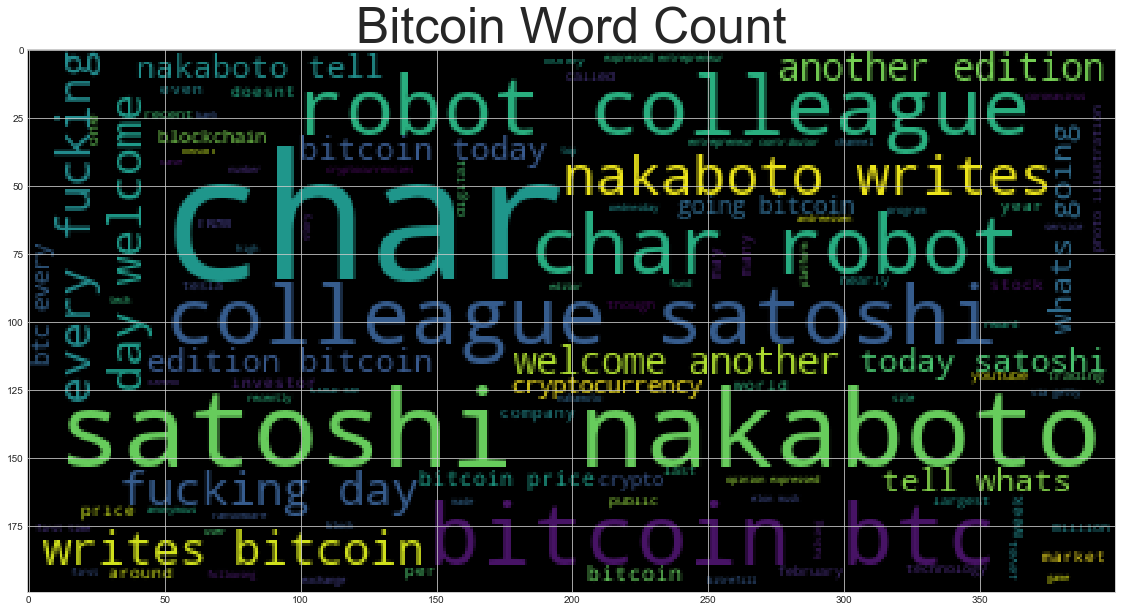

In [22]:
wc = WordCloud().generate(big_string2)
plt.title('Bitcoin Word Count', fontsize=50)
plt.imshow(wc)
plt.show()

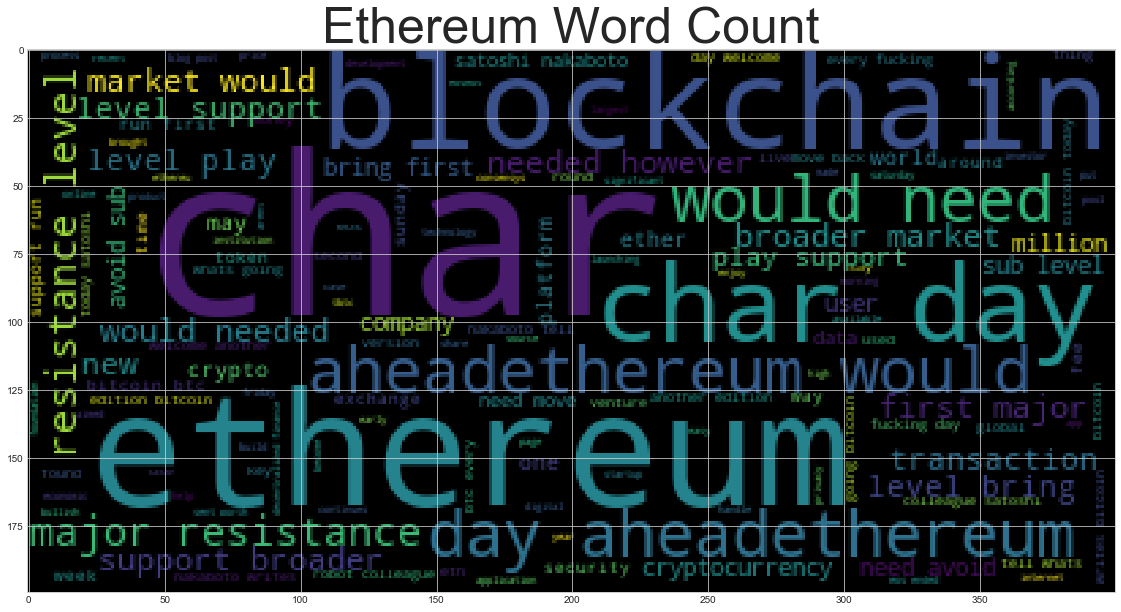

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(big_string)
plt.title('Ethereum Word Count', fontsize=50)
plt.imshow(wc)
plt.show()

In [24]:
# Generate the Ethereum word cloud

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [28]:
# Concatenate all of the bitcoin text together
big_string2

' winklevoss twinsthe brother mark zuckerberg allegedly stole idea facebook fromare making movie deadline reported week doesnt seem masturbatory enough r char planning protesting want risk expensive smartphone processor simply want keep anonymous possible outconsider buying char sachs gave five reason think bitcoin asset class suitable investment presentation wednesday morningliligoldman observed crypt char investor michael novogratz tweeted monday bitcoin soon take resistance level telling follower get train lilinovogratz said turmoil char robot colleague satoshi nakaboto writes bitcoin btc every fucking day welcome another edition bitcoin today satoshi nakaboto tell whats going bitcoin char robot colleague satoshi nakaboto writes bitcoin every fucking day welcome another edition bitcoin today satoshi nakaboto tell whats going bitcoin char opinion expressed entrepreneur contributor despite recent price volatilityand global macroeconomic uncertainty big year bitcoin although large numb

In [29]:
# Run the NER processor on all of the text

# Add a title to the document
doc = nlp(big_string2)
print('BitCoin NER')
# Render the visualization
displacy.render(doc, style='ent')

BitCoin NER


In [30]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'canada', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'poland', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'blockchain', 'bitcoin', 'bitcoin', 'bitcoin', 'paris', 'france', 'bitcoin', 'new delhi', 'bitcoin', 'bitcoin', 'bitcoin', 'u char', 'blockchain', 'paris', 'france', 'bitcoin', 'blockchain', 'bitcoin', 'bitcoin']


---

## Ethereum NER

In [31]:
big_string

' editor noteandreessen horowitzscrypto startup school brought together participant around u overseas sevenweek course learn build crypto company andreessen ho char robot colleague satoshi nakaboto writes bitcoin btc every fucking day welcome another edition bitcoin today satoshi nakaboto tell whats going bitcoin char editor noteandreessen horowitz crypto startup school brought together participant around u overseas sevenweek course learn build crypto company andreessen ho char developer looking quickly build identity management platform readily available option stray far internet biggest datahungry platform magic char akron ohio hometown lebron james seat u tire industry one hundred twenty seventh largest city u home america first toy company lates char opensource group linux foundation deal others arent fortunate drupal foundation open source initiative osi open source matter joomla char imagine sending friend charged million fee seems case cryptocurrency user paid million transactio

In [32]:
# Run the NER processor on all of the text

# Add a title to the document
doc2 = nlp(big_string)
print('Ethereum NER')
# Render the visualization
displacy.render(doc2, style='ent')

Ethereum NER


In [33]:
# List all Entities
print([ent.text for ent in doc2.ents if ent.label_ == 'GPE'])

['bitcoin', 'ohio', 'bitcoin', 'bitcoin', 'bitcoin', 'bitcoin', 'blockchain', 'poland', 'new york city united', 'bitcoin', 'blockchain', 'new york', 'blockchain', 'blockchain', 'blockchain', 'blockchain', 'questio', 'blockchain']
